In [4]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# import plotly.express as px

from pandas.tseries.holiday import USFederalHolidayCalendar

import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

ROOT = Path('../')
DATA = Path('G:/UNIPA/ECONOFISICA/DATA/BLOOMBERG')

In [39]:
def read_raw_data(market):
    raw_data = DATA / f'{market}.csv'
    df = pd.read_csv(raw_data,
                     index_col=0,
                     skiprows=[1],
                     sep=';',
                     decimal=',',
                     parse_dates=True,
                     na_values=['#N/D'])
    df.rename(columns=lambda x: x.replace(f' {market} Equity', ''), inplace=True)
    df.index.name = 'Day'
    # Order columns by number of values
    ordered_columns_list = df.isnull().sum().sort_values().index
    df = df.loc[:, ordered_columns_list]
    return df

def manipulate_dataframe(df, holidays=True, simple_index=False):
    # Order columns by number of values
    ordered_columns_list = df.isnull().sum().sort_values().index
    df = df.loc[:, ordered_columns_list]
    # Select business days
    if not holidays:
        business_days = pd.bdate_range(df.index[0], df.index[-1])
        df = df.loc[business_days]
    # Convert index format for easier visualization
    if simple_index:
        df.index = pd.to_datetime(df.index).strftime("%Y")
    return df

def make_plot(df, market, labels=False, title=None):
    fig, ax = plt.subplots(figsize=(16, 8))
    df_to_plot = df.diff() > 0
    mask = df.isna()
    
    # Create a diverging colormap: red for negative, white for zero, green for positive
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'red_white_green', ['red', 'green'], N=256)
    sns.heatmap(df_to_plot.T,
                mask=mask.T,
                yticklabels=labels,
                xticklabels=365,
                cmap=cmap,
                cbar=False,
                ax=ax)
    title = title if title is not None else f'Missing data in {market} market'
    ax.set_title(title, fontsize=24)
    ax.set_ylabel('Stocks', fontsize=24)
    ax.set_xlabel('Days', fontsize=24)
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor tick every 1 unit
     # Add grid lines for major ticks on x-axis
    ax.grid(which='major', axis='x', color='gray', linestyle='--', alpha=0.5)
    
    # Add grid lines for minor ticks on y-axis
    ax.grid(which='minor', axis='y', color='gray', linestyle='-', alpha=0.7)
    return ax


def make_miniplot(df):
    fig, ax = plt.subplots(figsize=(16, 4))
    sns.heatmap(df.isnull().T,
                xticklabels=365,
                cmap='viridis',
                cbar=True,
                ax=ax)
    ax.grid(visible=True, ls='--')
    return ax

def normalize_data(df):
    return df / df.max()

## GF

E:\Temp\ipykernel_30684\2785210344.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(raw_data,


Timestamp('1980-01-01 00:00:00')

Timestamp('2022-07-01 00:00:00')

(15523, 118)

<Axes: title={'center': 'Missing data in GF market'}, xlabel='Days', ylabel='Stocks'>

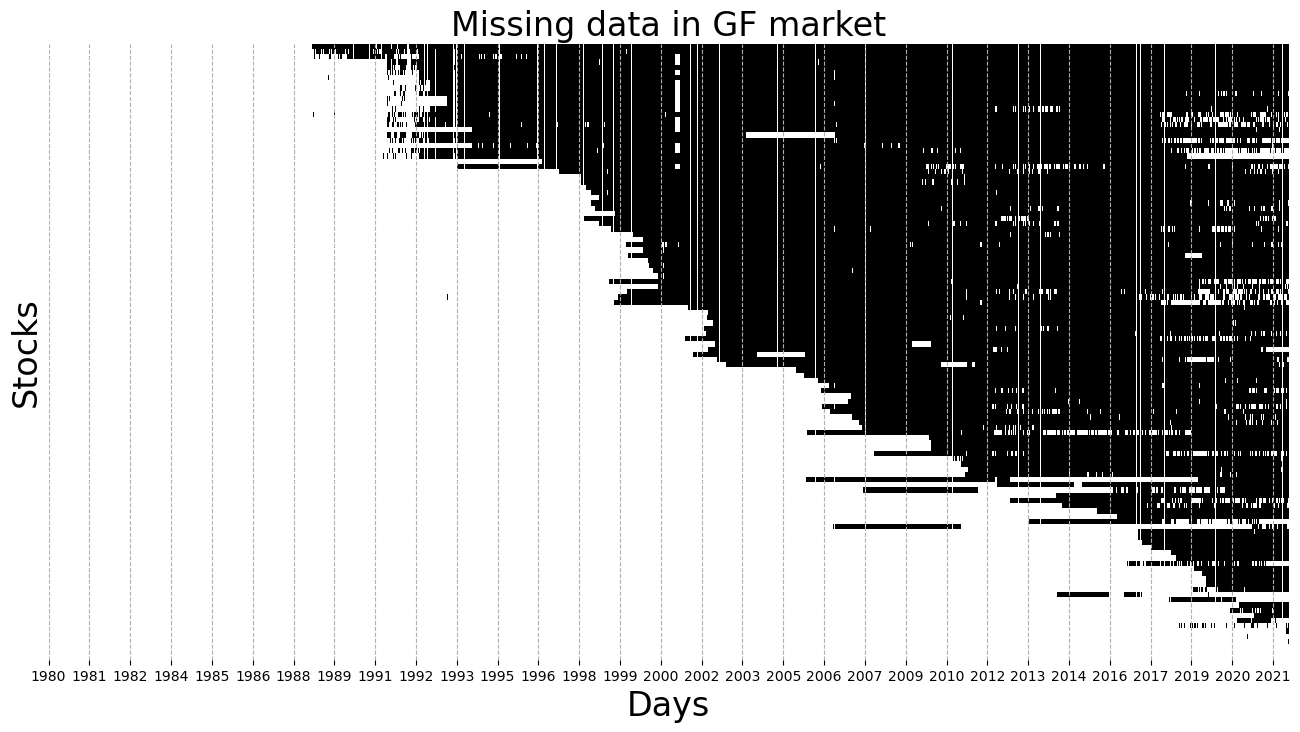

In [3]:
market = 'GF'
df = read_raw_data(market)
df = manipulate_dataframe(df)
display(df.index[0])
display(df.index[-1])
display(df.shape)

df_w_holidays = manipulate_dataframe(df, holidays=True, simple_index=True)
df_wout_holidays = manipulate_dataframe(df, holidays=False, simple_index=True)

# make_plot(df_w_holidays, market)
make_plot(df_wout_holidays, market)

## JT

In [ ]:
market = 'JT'
df = read_raw_data(market)
df = manipulate_dataframe(df)
display(df.index[0])
display(df.index[-1])
display(df.shape)

df_w_holidays = manipulate_dataframe(df, holidays=True, simple_index=True)
df_wout_holidays = manipulate_dataframe(df, holidays=False, simple_index=True)

# make_plot(df_w_holidays, market)
make_plot(df_wout_holidays, market)

## LN

In [ ]:
market = 'LN'
df = read_raw_data(market)
df = manipulate_dataframe(df)
display(df.index[0])
display(df.index[-1])
display(df.shape)

df_w_holidays = manipulate_dataframe(df, holidays=True, simple_index=True)
df_wout_holidays = manipulate_dataframe(df, holidays=False, simple_index=True)

# make_plot(df_w_holidays, market)
make_plot(df_wout_holidays, market)

## UN

In [28]:
market = 'UN'
df = read_raw_data(market)
df = manipulate_dataframe(df)
display(df.index[0])
display(df.index[-1])
display(df.shape)

df_w_holidays = manipulate_dataframe(df, holidays=True, simple_index=True)
df_wout_holidays = manipulate_dataframe(df, holidays=False, simple_index=True)
# Take a random sample of stocks
subsample = df_w_holidays.sample(n=20, axis='columns').count().sort_values(ascending=False).index


Timestamp('1980-01-01 00:00:00')

Timestamp('2022-07-01 00:00:00')

(15523, 2744)

<Axes: title={'center': 'UN'}, xlabel='Days', ylabel='Stocks'>

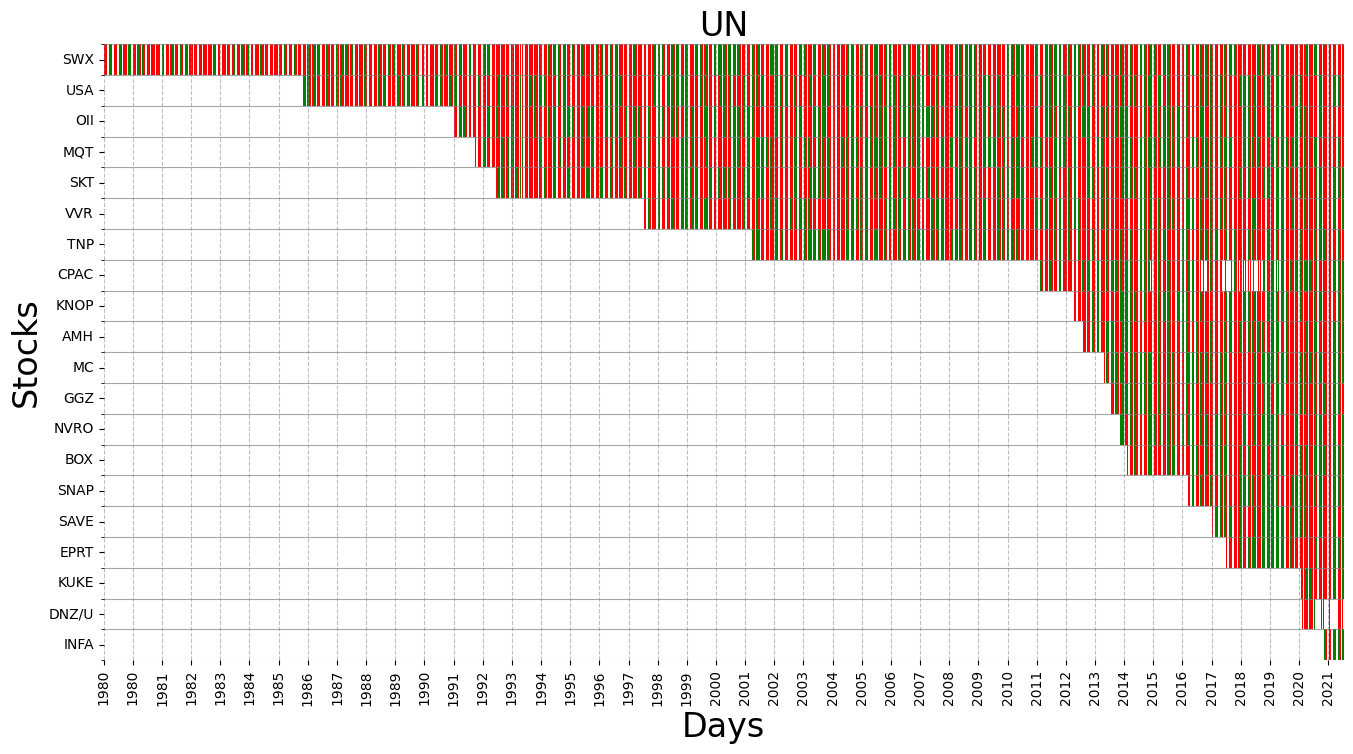

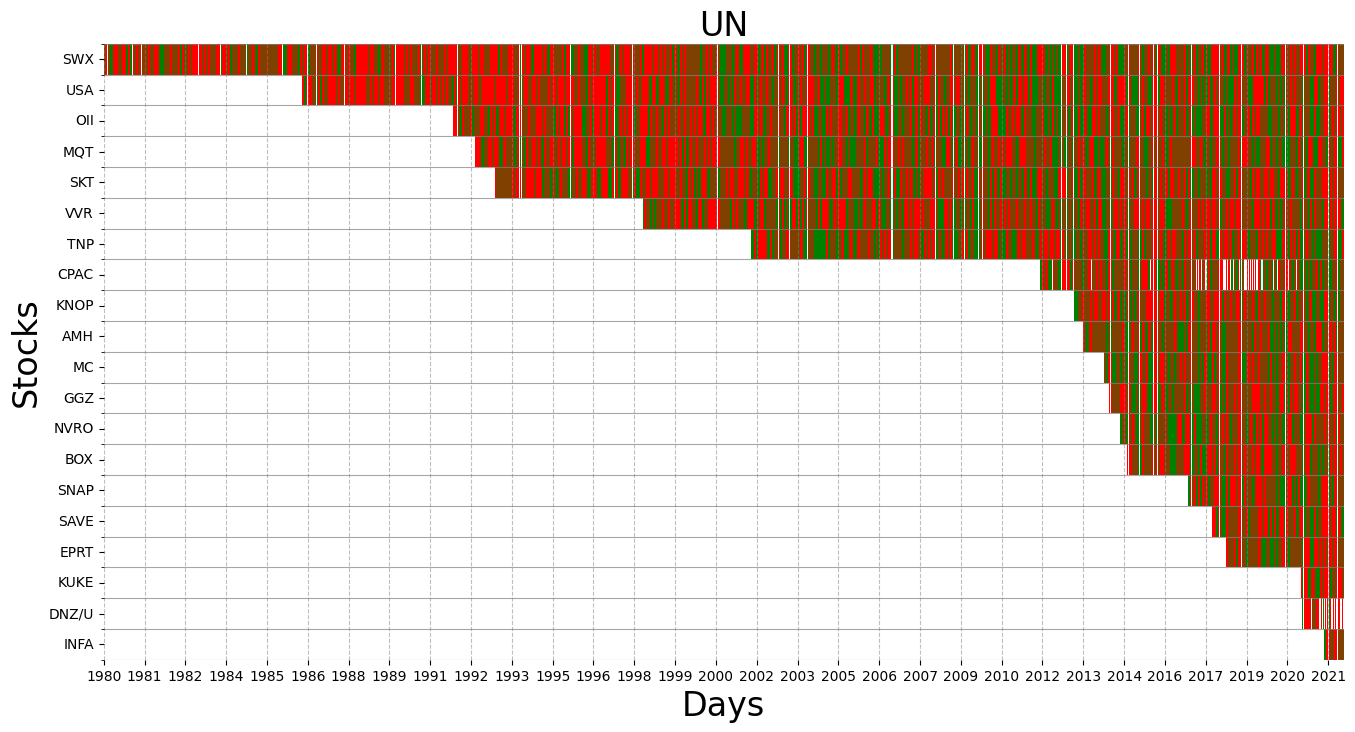

In [40]:
make_plot(df_w_holidays[subsample], market, labels=True, title="UN")
make_plot(df_wout_holidays[subsample], market, labels=True, title="UN")

## UW

In [ ]:
market = 'UW'
df = read_raw_data(market)
df = manipulate_dataframe(df)
display(df.index[0])
display(df.index[-1])
display(df.shape)

df_w_holidays = manipulate_dataframe(df, holidays=True, simple_index=True)
df_wout_holidays = manipulate_dataframe(df, holidays=False, simple_index=True)

# make_plot(df_w_holidays, market)
make_plot(df_wout_holidays, market)